<a href="https://colab.research.google.com/github/jeffblackadar/image_work/blob/master/coin_model_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install --upgrade -q gspread

In [0]:
from google.colab import auth
auth.authenticate_user()

730
1460


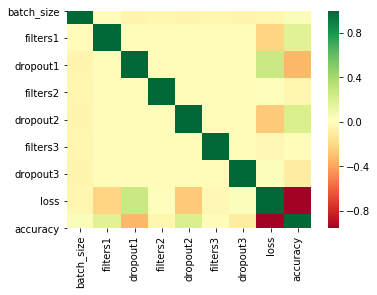

In [5]:
import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import seaborn as sns

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open the coin_models spreadsheet
sh = gc.open('coin_models_2')
worksheet_config = sh.worksheet(title="config")
worksheet_models = sh.worksheet(title="models")

#models = [[1,730]]
models = [[730,1460]]
#models = [[1,1460]]

for m in models:
  print(m[0])
  print(m[1])
  BATCH_SIZE_col_list = worksheet_models.col_values(2) #, 'batch_size')
  BATCH_SIZE_col_list = list(map(int,BATCH_SIZE_col_list[m[0]:m[1]]))
  filters1_col_list = worksheet_models.col_values(3) #, 'filters1')
  filters1_col_list = list(map(int,filters1_col_list[m[0]:m[1]]))
  dropout1_col_list = worksheet_models.col_values(4) #, 'dropout1')
  dropout1_col_list = list(map(float,dropout1_col_list[m[0]:m[1]]))
  filters2_col_list = worksheet_models.col_values(5) #, 'filters2')
  filters2_col_list = list(map(int,filters2_col_list[m[0]:m[1]]))
  dropout2_col_list = worksheet_models.col_values(6) #, 'dropout2')
  dropout2_col_list = list(map(float,dropout2_col_list[m[0]:m[1]]))
  filters3_col_list = worksheet_models.col_values(7) #, 'filters3')
  filters3_col_list = list(map(int,filters3_col_list[m[0]:m[1]]))
  dropout3_col_list = worksheet_models.col_values(8) #, 'dropout3')
  dropout3_col_list = list(map(float,dropout3_col_list[m[0]:m[1]]))
  loss_col_list = worksheet_models.col_values(10)
  loss_col_list = list(map(float,loss_col_list[m[0]:m[1]]))
  accuracy_col_list = worksheet_models.col_values(11)
  accuracy_col_list = list(map(float,accuracy_col_list[m[0]:m[1]]))
  model_performance = pd.DataFrame(np.column_stack([BATCH_SIZE_col_list,filters1_col_list,dropout1_col_list,filters2_col_list,dropout2_col_list,filters3_col_list,dropout3_col_list,loss_col_list,accuracy_col_list]), columns=['batch_size','filters1','dropout1','filters2','dropout2','filters3','dropout3','loss','accuracy'])
  sns.heatmap(model_performance.corr(), square=True, cmap='RdYlGn')

    